<a href="https://colab.research.google.com/github/rsrahul18/Entri-works/blob/main/Weather_Prediction_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"/content/seattle-weather.csv")
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [4]:
df=pd.DataFrame(data)
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.isnull().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [9]:
df.duplicated().sum()

0

In [11]:
#Define features and target
x=df.drop(columns=['date','weather'],axis=1)  #Feature
y=df['weather']  #Target
y


,weather
0,drizzle
1,rain
2,rain
3,rain
4,rain
...,...
1456,rain
1457,rain
1458,fog
1459,sun


In [12]:
from sklearn.preprocessing import LabelEncoder
#Encode the target variable
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 2, 2, ..., 1, 4, 4])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
#Split the dataset into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [17]:
x_train.shape

(1095, 4)

In [18]:
y_train.shape

(1095,)

In [19]:
#Initialize train thec model
Logreg=LogisticRegression()
Logreg.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Make prediction
y_pred=Logreg.predict(x_test)
y_pred

array([4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 4, 3, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4,

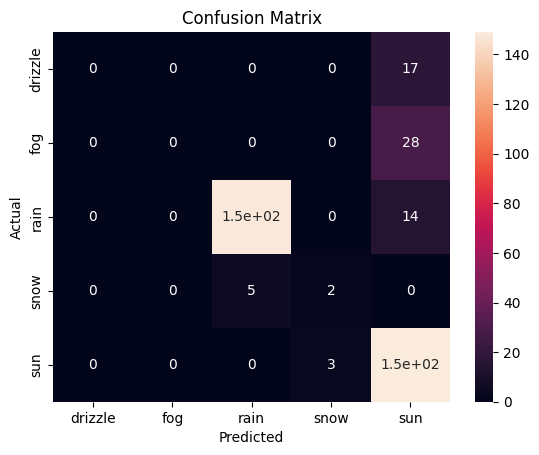

In [23]:
co=confusion_matrix(y_test,y_pred)
sns.heatmap(co,annot=True,xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  0   0   0   0  17]
 [  0   0   0   0  28]
 [  0   0 148   0  14]
 [  0   0   5   2   0]
 [  0   0   0   3 149]]


In [25]:
# Classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        28
           2       0.97      0.91      0.94       162
           3       0.40      0.29      0.33         7
           4       0.72      0.98      0.83       152

    accuracy                           0.82       366
   macro avg       0.42      0.44      0.42       366
weighted avg       0.73      0.82      0.77       366



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:")
print(accuracy)

Accuracy Score:
0.8169398907103825


In [29]:
y_pred

array([4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       4, 4, 3, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2,
       4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       2, 4, 4, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4,

In [30]:
y_test

array([0, 2, 4, 4, 2, 4, 1, 4, 0, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 4,
       2, 1, 3, 4, 2, 2, 2, 2, 0, 2, 2, 2, 4, 1, 2, 2, 4, 4, 1, 4, 2, 4,
       4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 3, 4, 2,
       2, 4, 4, 0, 0, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 1, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 1, 2, 1, 4, 2, 2, 1, 2, 4, 2,
       1, 4, 2, 2, 4, 2, 4, 4, 1, 2, 2, 2, 2, 2, 0, 2, 4, 4, 2, 2, 4, 1,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 1, 4, 4, 0, 4, 0, 2, 4, 2, 4, 4,
       0, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2,
       2, 4, 2, 3, 2, 4, 4, 2, 1, 2, 4, 1, 4, 4, 1, 1, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 4, 3, 4, 2, 4, 0, 1, 2, 4, 2, 2, 2, 4, 4, 2, 0, 2,
       2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 1, 2, 2, 4,
       4, 4, 2, 4, 4, 2, 1, 1, 2, 4, 1, 4, 3, 2, 2, 2, 4, 1, 4, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 4, 2, 1, 2, 4, 2, 0, 2,